In [34]:
# Unit 6 | Assignment - What's the Weather Like?

# Dependencies
import csv
import json
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
from config import api_key
import random
%matplotlib inline

In [35]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
#query_url = "{url}appid={api_key}&units={units}&q="
query_url = "%sappid=%s&units=%s&q="%(url, api_key, units)
#query_url

In [36]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.
# Save both a CSV of all data retrieved and png images for each scatter plot.

# play with citipy!
# city = citipy.nearest_city(40.6936, -89.5890)
# print(city.city_name)
# print(city.country_code)

In [37]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Generate a list of at least 500 random, unique cities

# since citipy won't grab 500 cities at a time, i will loop thru 15 times
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
CandidateCityList = []

for number in numbers:
    # Generate random lattitudes from -90 to 90
    # create a list of random lattitudes
    ListLength = 100
    LatList = random.sample(list(range(-90,90)),ListLength)
    LonList = random.sample(list(range(-180,180)),ListLength)
    #print(LatList)
    #print(LonList)

    # Loop & append
    # Loop through the list of cities and perform a request for data on each
    i = 0
    for i in range(0, len(LatList)):
        TestCity = citipy.nearest_city(LatList[i], LonList[i])
        CandidateCityList.append(TestCity.city_name) 

#print(CandidateCityList)
print(len(CandidateCityList))
# clean up dups
FinalCityList = list(set(CandidateCityList))
print(FinalCityList)
print(len(FinalCityList))


1500
['santa rosa', 'upernavik', 'swellendam', 'kasangulu', 'purwodadi', 'taltal', 'mys shmidta', 'bluff', 'petropavlovsk-kamchatskiy', 'rongcheng', 'sakakah', 'sorsk', 'caravelas', 'kulhudhuffushi', 'marzuq', 'colac', 'otautau', 'agirish', 'te anau', 'mangrol', 'hami', 'inuvik', 'ushuaia', 'genhe', 'nizhneyansk', 'malwan', 'altay', 'manosque', 'stokmarknes', 'athabasca', 'barahan', 'bull savanna', 'butaritari', 'stantsiya gorchakovo', 'tungor', 'lebu', 'namibe', 'barcelona', 'ouegoa', 'haines junction', 'rawson', 'tukrah', 'jinchang', 'nguiu', 'kieta', 'longlac', 'merauke', 'ust-maya', 'bathurst', 'luderitz', 'rostovka', 'katherine', 'peresichna', 'saleaula', 'cascais', 'chicontepec', 'biak', 'yertsevo', 'karkaralinsk', 'aklavik', 'zyryanka', 'balikpapan', 'sitka', 'vila franca do campo', 'geresk', 'konstancin-jeziorna', 'osorheiu', 'ayagoz', 'de-kastri', 'okhotsk', 'yellowknife', 'phan thiet', 'kamenka', 'sentyabrskiy', 'voyvozh', 'zima', 'luganville', 'grajau', 'palmer', 'richards b

In [38]:
# play with the weather API
# Save config information
current_city = "Peoria"
#current_city = "belushya guba"
# Build query URL
current_url = query_url + current_city
#current_url
response = req.get(current_url).json() # returns a dictionary?
response.keys()                # keys from the dictionary 
#print(json.dumps(response, indent = 4, sort_keys = True))


dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [39]:
# Perform API calls
#TestCityList = ['peoria', 'paris', 'moscow', 'cape town', 'mumbai', 'london', 'seattle']
TestCityList = FinalCityList

# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
lat = []
lng = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Loop & append
CityNbr = 0
# Loop through the list of cities and perform a request for data on each
for city in TestCityList:
    response = req.get(query_url + city).json()
    try:
        print('Looking for:  '+ str(CityNbr) + ' ' + city)
        print(query_url + city)
        cityname.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        CityNbr = CityNbr + 1
    except:
        print('Looking for:  '+ city + ' not found')
# print("City Names: %s"%(cityname))
# print("The latitude information received is: %s"%(lat))
# print("The temperature information received is: %s"%(maxtemp))


Looking for:  0 santa rosa
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=santa rosa
Looking for:  1 upernavik
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=upernavik
Looking for:  2 swellendam
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=swellendam
Looking for:  3 kasangulu
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=kasangulu
Looking for:  4 purwodadi
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=purwodadi
Looking for:  5 taltal
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=taltal
Looking for:  6 mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=mys shmidta
Looking for:  mys shmidta not found
Loo

Looking for:  49 karkaralinsk
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=karkaralinsk
Looking for:  karkaralinsk not found
Looking for:  49 aklavik
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=aklavik
Looking for:  50 zyryanka
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=zyryanka
Looking for:  51 balikpapan
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=balikpapan
Looking for:  52 sitka
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=sitka
Looking for:  53 vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=vila franca do campo
Looking for:  54 geresk
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=met

Looking for:  97 kuusamo
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=kuusamo
Looking for:  98 goderich
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=goderich
Looking for:  99 hilo
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=hilo
Looking for:  100 victoria
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=victoria
Looking for:  101 bochil
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=bochil
Looking for:  102 meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=meulaboh
Looking for:  103 whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=whitehorse
Looking for:  104 san rafael
http://api.openweathermap

Looking for:  155 ganzhou
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=ganzhou
Looking for:  156 chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=chokurdakh
Looking for:  157 misratah
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=misratah
Looking for:  158 goryachegorsk
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=goryachegorsk
Looking for:  159 pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=pacific grove
Looking for:  160 saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=saint anthony
Looking for:  161 warwick
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=warwick
Looking for

Looking for:  214 sorland
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=sorland
Looking for:  215 fort abbas
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=fort abbas
Looking for:  216 sol-iletsk
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=sol-iletsk
Looking for:  217 valkeakoski
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=valkeakoski
Looking for:  218 den chai
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=den chai
Looking for:  219 bloemfontein
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=bloemfontein
Looking for:  220 rikitea
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=rikitea
Looking for:  221 adrar

Looking for:  267 khormuj
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=khormuj
Looking for:  khormuj not found
Looking for:  267 gamba
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=gamba
Looking for:  268 leh
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=leh
Looking for:  269 barcelos
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=barcelos
Looking for:  270 sur
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=sur
Looking for:  271 aguada de pasajeros
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=aguada de pasajeros
Looking for:  272 trelew
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=trelew
Looking for:  273 t

Looking for:  323 torzhok
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=torzhok
Looking for:  324 anadyr
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=anadyr
Looking for:  325 bogovina
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=bogovina
Looking for:  326 krutikha
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=krutikha
Looking for:  327 grootfontein
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=grootfontein
Looking for:  328 auki
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=auki
Looking for:  329 baghdad
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=baghdad
Looking for:  330 ruatoria
http://api.openweather

Looking for:  377 puri
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=puri
Looking for:  378 cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=cabedelo
Looking for:  379 yilan
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=yilan
Looking for:  380 cefalu
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=cefalu
Looking for:  381 aykhal
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=aykhal
Looking for:  382 rocha
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=rocha
Looking for:  383 concepcion
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=concepcion
Looking for:  384 georgetown
http://api.openweathermap.org/data/2

Looking for:  427 mataura
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=mataura
Looking for:  428 beidao
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=beidao
Looking for:  429 dapaong
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=dapaong
Looking for:  430 ust-tsilma
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=ust-tsilma
Looking for:  431 calabozo
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=calabozo
Looking for:  432 sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=sioux lookout
Looking for:  433 bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=bredasdorp
Looking for:  434 road town
htt

Looking for:  481 tarauaca
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=tarauaca
Looking for:  482 sherpur
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=sherpur
Looking for:  483 manado
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=manado
Looking for:  484 mahaicony
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=mahaicony
Looking for:  mahaicony not found
Looking for:  484 presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=presidencia roque saenz pena
Looking for:  485 kilosa
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=kilosa
Looking for:  486 tabou
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&un

Looking for:  531 colombo
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=colombo
Looking for:  532 malartic
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=malartic
Looking for:  533 khash
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=khash
Looking for:  534 tartus
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=tartus
Looking for:  tartus not found
Looking for:  534 bud
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=bud
Looking for:  535 nizhnyaya salda
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=nizhnyaya salda
Looking for:  536 morros
http://api.openweathermap.org/data/2.5/weather?appid=072d7a0514e41ad73f86777cb59af9d0&units=metric&q=morros
Looking for:  537 lago

In [41]:
# create the dataframe to hold the results 

# create a data frame from cities, lat, and temp
weather_dict = {'City': cityname,
                'Cloudiness': cloudiness,
                'Country': country,
                'Date': date,
                'Humidity': humidity,
                'Lat': lat,
                'Lng': lng,
                'Max Temp': maxtemp,
                'Wind Speed' : windspeed
                }

CityResults_df = pd.DataFrame(weather_dict)
CityResults_df.head(600)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Santa Rosa,20,AR,1520901300,46,-36.62,-64.29,23.00,6.70
1,Upernavik,36,GL,1520906999,96,72.79,-56.15,-18.98,0.51
2,Swellendam,0,ZA,1520902800,88,-34.02,20.44,17.00,1.00
3,Kasangulu,12,CD,1520902800,74,-4.59,15.17,26.00,1.00
4,Purwodadi,76,ID,1520907001,89,-7.08,110.92,26.22,1.26
5,Taltal,0,CL,1520907001,97,-25.41,-70.49,11.57,0.66
6,Bluff,36,AU,1520906921,37,-23.58,149.07,31.12,6.31
7,Petropavlovsk-Kamchatskiy,48,RU,1520904600,48,53.05,158.65,-6.00,1.00
8,Rongcheng,0,CN,1520907003,58,37.16,122.42,16.12,7.16
9,Sorsk,0,RU,1520907003,71,54.00,90.25,-19.93,0.56


In [42]:
# Write the dataframe to a .csv
file_name = 'City_results.csv'
CityResults_df.to_csv(file_name, encoding='utf-8', index=False)




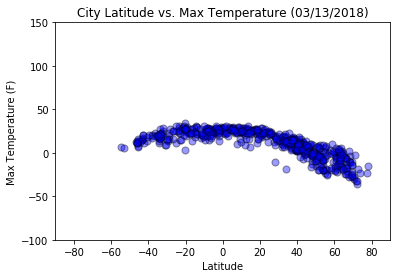

In [43]:
# set the date
currentdate = '03/13/2018'

# Scatter Plots - Temperature (F) vs. Latitude
x_axis = CityResults_df['Lat']
y_axis = CityResults_df['Max Temp']
TempVsLat = plt.scatter(x_axis, y_axis, marker="o", facecolors= 'blue', edgecolors='black',
            s=50, alpha=0.40)

plt.xlim(-90, 90)
plt.ylim(-100, 150)

plt.title('City Latitude vs. Max Temperature (' + currentdate + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('TempVsLat.png')

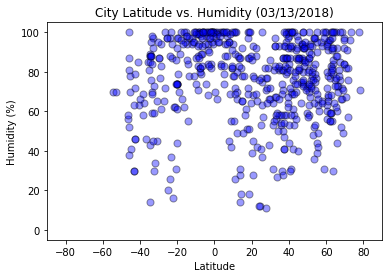

In [44]:
# Scatter Plots - Humidity (%) vs. Latitude
x_axis = CityResults_df['Lat']
y_axis = CityResults_df['Humidity']
HumidityVsLat = plt.scatter(x_axis, y_axis, marker="o", facecolors= 'blue', edgecolors='black',
            s=50, alpha=0.40)

plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.title('City Latitude vs. Humidity (' + currentdate + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('HumidityVsLat.png')

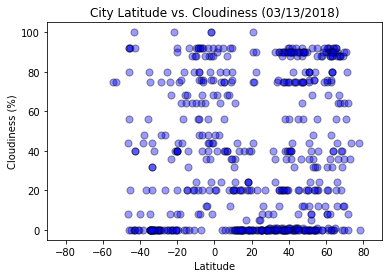

In [45]:
# Scatter Plots - Cloudiness (%) vs. Latitude
x_axis = CityResults_df['Lat']
y_axis = CityResults_df['Cloudiness']
CloudVsLat = plt.scatter(x_axis, y_axis, marker="o", facecolors= 'blue', edgecolors='black',
            s=50, alpha=0.40)

plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.title('City Latitude vs. Cloudiness (' + currentdate + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('CloudVsLat.png')

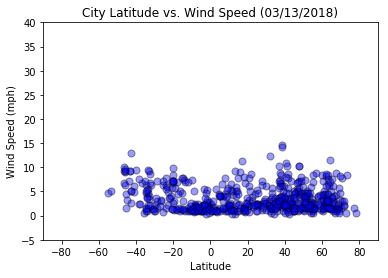

In [46]:
# Scatter Plots - Wind Speed (mph) vs. Latitude
x_axis = CityResults_df['Lat']
y_axis = CityResults_df['Wind Speed']
WindVsLat = plt.scatter(x_axis, y_axis, marker="o", facecolors= 'blue', edgecolors='black',
            s=50, alpha=0.40)

plt.xlim(-90, 90)
plt.ylim(-5, 40)

plt.title('City Latitude vs. Wind Speed (' + currentdate + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('WindVsLat.png')

In [ ]:
#  Your final notebook must:
#  • Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#  • Perform a weather check on each of the cities using a series of successive API calls.
#  • Include a print log of each city as it's being processed with the city number, city name, 
#    and requested URL.
#  • Save both a CSV of all data retrieved and png images for each scatter plot.

#  As final considerations:
#  • You must use the Matplotlib and Seaborn libraries.
#  • You must include a written description of three observable trends based on the data.
#  • You must use proper labeling of your plots, including aspects like: Plot Titles (with date 
#    of analysis) and Axes Labels.
#  • You must include an exported markdown version of your Notebook called README.md in your 
#    GitHub repository.
#  • See Example Solution for a reference on expected format.

#  Hints and Considerations
#  • You may want to start this assignment by refreshing yourself on 4th grade geography, in 
#    particular, the geographic coordinate system.
#  • Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your
#    initial study, you should be able to answer basic questions about the API: Where do you
#    request the API key? Which Weather API in particular will you need? What URL endpoints
#    does it expect? What JSON structure does it respond with? Before you write a line of code,
#    you should be aiming to have a crystal clear understanding of your intended outcome.
#  • Though we've never worked with the citipy Python library, push yourself to decipher how 
#    it works, and why it might be relevant. Before you try to incorporate the library into your
#    analysis, start by creating simple test cases outside your main script to confirm that you 
#    are using it correctly. Too often, when introduced to a new library, students get bogged 
#    down by the most minor of errors -- spending hours investigating their entire code -- when,
#    in fact, a simple and focused test would have shown their basic utilization of the library 
#    was wrong from the start. Don't let this be you!
#  • Part of our expectation in this challenge is that you will use critical thinking skills to 
#    understand how and why we're recommending the tools we are. What is Citipy for? Why would 
#    you use it in conjunction with the OpenWeatherMap API? How would you do so?
#  • In building your script, pay attention to the cities you are using in your query pool. Are 
#    you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing
#    500 cities concentrated in one region of the world? Even if you were a geographic genius, 
#    simply rattling 500 cities based on your human selection would create a biased dataset. Be 
#    thinking of how you should counter this. (Hint: Consider the full range of latitudes).
#  • Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, 
#    then you can safely say that you've gained a strong mastery of the core foundations of data 
#    analytics and it will only go better from here. Good luck!

In [10]:
# Generate a Sample Cities List
#create a sample file for creating the plots
#ResultsColumnNames = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
# Populate the sample columns
#CityList = ['longyearbyen', 'Asau', 'hartselle', 'komsomolskiy', 'kapaa']
#CloudinessList = [75, 0, 1, 40, 90]
#CountryList = ['SJ','RO', 'US','UZ', 'US']
#DateList = [1483588200, 1483592400, 1483592280, 1483592400, 1483592160]
#HumidityList = [73, 59, 86, 80, 88]
#LatList = [78.22, 46.43, 34.44, 40.43, 22.08]
#LngList = [15.64, 26.40, -86.94, 71.72, -159.32]
#MaxTempList = [26.6, 37.4, 32.0, 37.4, 71.6]
#WindSpeedList = [19.46, 14.99, 3.36, 3.36, 17.22]

# create a dataframe and insert the data
#CityResults_df = pd.DataFrame(columns=ResultsColumnNames) # Note that there are no rows of data inserted.
#Results_df['City'] = CityList
#Results_df['Cloudiness'] = CloudinessList
#Results_df['Country'] = CountryList
#Results_df['Date'] = DateList
#Results_df['Humidity'] = HumidityList
#Results_df['Lat'] = LatList
#Results_df['Lng'] = LngList
#Results_df['Max Temp'] = MaxTempList
#Results_df['Wind Speed'] = WindSpeedList
# Take a look:
#Results_df.head()
